In [1023]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1024]:
data=pd.read_csv(r"C:\Users\reshm\OneDrive\Desktop\New folder\car_age_price.csv")

In [1025]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [1026]:
data.shape

(112, 2)

In [1027]:
data['Year'].nunique()

8

In [1028]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [1029]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [1030]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [1031]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [1032]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


## Outlier Handling

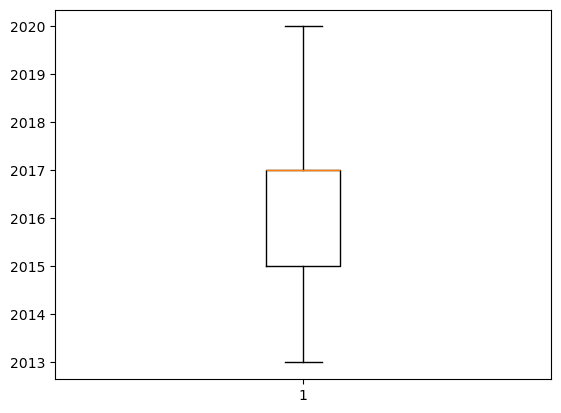

In [1033]:
plt.boxplot(data['Year'])
plt.show()

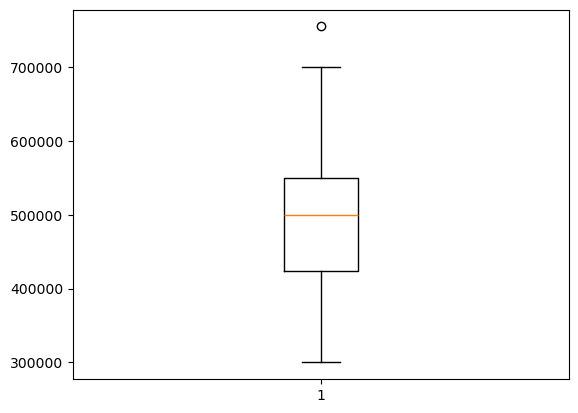

In [1034]:
plt.boxplot(data['Price'])
plt.show()

In [1035]:
Q1=np.percentile(data['Price'],25)
Q3=np.percentile(data['Price'],75)
IQR=Q3-Q1

In [1036]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [1037]:
low_lim,upp_lim

(np.float64(234375.0), np.float64(739375.0))

In [1038]:
outlier=[]
for i in data['Price']:
    if i>upp_lim or i<low_lim:
        outlier.append(i)

In [1039]:
ind=data['Price']>upp_lim
data.loc[ind].index

Index([1], dtype='int64')

In [1040]:
data.drop([1],inplace=True)

In [1041]:
data.shape

(111, 2)

##  Scaling

In [1042]:
x=data.drop('Price',axis=1)
y=data['Price']

In [1043]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [1044]:
x_scaled=std_scaler.fit_transform(x)

In [1045]:
x_scaled=pd.DataFrame(x_scaled)
x_scaled.head()

,0
0,0.837062
1,1.456488
2,0.837062
3,0.837062
4,-1.021216


In [1046]:
x_scaled.columns=['Year']
x_scaled.head()

,Year
0,0.837062
1,1.456488
2,0.837062
3,0.837062
4,-1.021216


In [1047]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression

In [1048]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [1049]:
model=lr.fit(x_train,y_train)

In [1050]:
predictions=model.predict(x_test)
predictions

array([418695.08304033, 541198.43288521, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.8828335 ,
       622867.33278179, 500363.98293692, 418695.08304033, 377860.63309203,
       541198.43288521, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314373, 459529.53298862, 582032.8828335 ,
       582032.8828335 , 500363.98293692, 500363.98293692])

In [1051]:
y_test

79     400000
11     500000
5      350000
85     320000
65     495000
69     300000
31     550000
46     500000
97     640000
12     500000
80     390000
81     390000
0      465000
82     390000
19     500000
71     490000
57     550000
73     320000
110    420000
43     550000
13     600000
37     486000
66     525000
Name: Price, dtype: int64

In [1052]:
from sklearn.metrics import mean_squared_error,r2_score

In [1053]:
print('Mean Squared Error=',mean_squared_error(y_test,predictions))
print('R Squared Value=',r2_score(y_test,predictions))

Mean Squared Error= 2360736941.0488067
R Squared Value= 0.7087665874512326


In [1054]:
Actual=[]
for i in y_test:
    Actual.append(i)    

In [1055]:
predic=predictions.tolist()

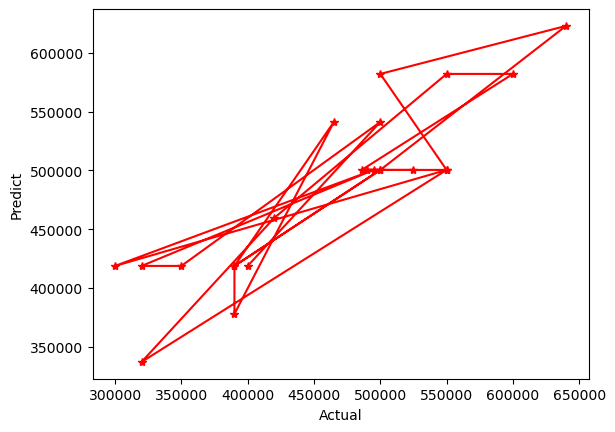

In [1056]:
plt.plot(Actual,predic,marker='*',color='Red')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()

In [1057]:
year_2022 = np.array([[2022]])

In [1058]:
predicted_price = model.predict(year_2022)
predicted_price

array([704536.23267838])

## Lasso Regression

In [1059]:
from sklearn.linear_model import Lasso

In [1060]:
lasso=Lasso(alpha=0.1)
model_lasso=lasso.fit(x_train,y_train)

In [1061]:
predictions_lasso=model_lasso.predict(x_test)

In [1062]:
print('Mean Squared Error =',mean_squared_error(y_test,predictions_lasso))
print('R squared value=',r2_score(y_test,predictions_lasso))

Mean Squared Error = 2360738206.8636756
R squared value= 0.7087664312933915


In [1063]:
year1_2022 = np.array([[2022]])

In [1064]:
predicted_price1 = lasso.predict(year1_2022)
predicted_price1

array([704536.01882109])

## Ridge 

In [1065]:
from sklearn.linear_model import Ridge

In [1066]:
ridge=Ridge(alpha=0.1)
model_ridge=ridge.fit(x_train,y_train)

In [1067]:
predictions_ridge=model_ridge.predict(x_test)

In [1068]:
print('Mean Squared Error=',mean_squared_error(y_test,predictions_ridge))
print('R squared value=',r2_score(y_test,predictions_ridge))

Mean Squared Error= 2361325087.996782
R squared value= 0.7086940304289906


In [1069]:
year2_2022 = np.array([[2022]])

In [1070]:
predicted_price2 = ridge.predict(year2_2022)
predicted_price2

array([704437.04207495])